In [1]:
from coronavirus_analyzer import CoronavirusAnalyzer
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
last_date = '2020-02-18'
analyzer = CoronavirusAnalyzer(last_date, first_date='2020-01-17')

2020-02-19 23:14:58,418 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


In [3]:
# for n in range(1, 11):
#     df = analyzer.get_df_move_inc_corr(n=n).iloc[:, 0::3]
#     print(n, df.mean().mean())

corr: 0.06541116685703258


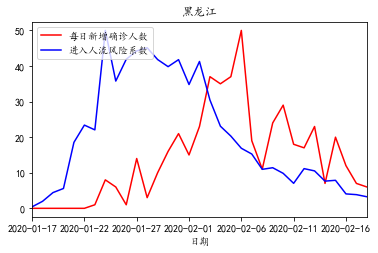

In [4]:
analyzer.plot_move_inc_corr('黑龙江', '2020-02-18', n=3, shift=0, window=1)

corr: 0.7106724609552307


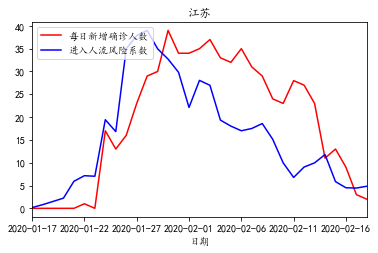

In [5]:
analyzer.plot_move_inc_corr('江苏', '2020-02-18', n=3, shift=0, window=1)

corr: 0.856788667408223


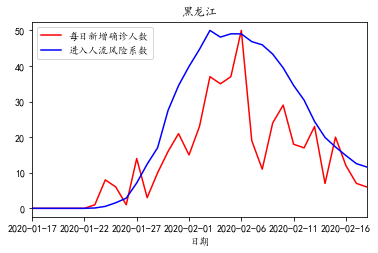

In [6]:
analyzer.plot_move_inc_corr('黑龙江', '2020-02-18')  # , n=3, shift=4, window=10

corr: 0.946188026186729


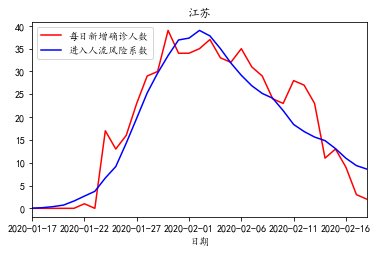

In [7]:
analyzer.plot_move_inc_corr('江苏', '2020-02-18')  # , n=3, shift=0, window=9

In [8]:
df = analyzer.df_move_inc_corr

In [9]:
data = []
for region in df.columns.levels[0]:
    df_region = df[region]
    shift_mean = df_region['shift'].mean()
    window_mean = df_region['window'].mean()
    data.append({'地区': region, 'shift均值': shift_mean, 'window均值': window_mean, '总均值': shift_mean + window_mean})
df_mean = pd.DataFrame(data).sort_values(['总均值', 'shift均值', 'window均值'])
df_mean = df_mean.set_index('地区')
df_mean = df_mean.T
df_mean

地区,福建,青海,西藏,辽宁,云南,上海,浙江,武汉,重庆,广西,宁夏,陕西,北京,天津,广东,甘肃,四川,海南,江苏,山东,吉林,湖南,山西,河北,内蒙古,贵州,新疆,安徽,河南,江西,黑龙江,湖北
shift均值,0.785714,0.884615,1.428571,0.535714,1.178571,1.827586,1.517241,1.6875,2.172414,2.107143,1.678571,2.807692,2.172414,3.965517,1.275862,0.653846,0.931034,1.142857,0.535714,0.655172,5.038462,3.285714,1.857143,2.785714,0.769231,4.285714,2.461538,2.535714,3.448276,4.142857,4.592593,5.482759
window均值,1.285714,1.384615,1.238095,2.285714,2.071429,1.620690,2.068966,2.0000,1.586207,2.250000,2.714286,2.038462,2.689655,1.172414,4.448276,5.576923,5.310345,5.142857,6.107143,6.241379,2.038462,4.142857,5.821429,5.071429,7.269231,4.214286,6.153846,6.535714,6.275862,6.107143,6.296296,6.931034
总均值,2.071429,2.269231,2.666667,2.821429,3.250000,3.448276,3.586207,3.6875,3.758621,4.357143,4.392857,4.846154,4.862069,5.137931,5.724138,6.230769,6.241379,6.285714,6.642857,6.896552,7.076923,7.428571,7.678571,7.857143,8.038462,8.500000,8.615385,9.071429,9.724138,10.250000,10.888889,12.413793


In [10]:
df[df_mean.columns]

福建                     青海                     西藏        \
                corr shift window      corr shift window      corr shift   
2020-01-17       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-18       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-19       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-20       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-21       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-22  1.000000   5.0    3.0       NaN   NaN    NaN       NaN   NaN   
2020-01-23  0.552122   0.0    2.0       NaN   NaN    NaN       NaN   NaN   
2020-01-24  0.998281   7.0    5.0  1.000000   7.0    1.0       NaN   NaN   
2020-01-25  0.911914   3.0    1.0  0.558260   0.0    1.0       NaN   NaN   
2020-01-26  0.940232   5.0    2.0  0.945611   9.0    3.0       NaN   NaN   
2020-01-27  0.912474   2.0    1.0  0.908024   2.0    1.0       NaN   NaN   
2020-01-28  0.847526   0.0    1.0  0.643052   5.0    1.0       NaN   NaN   
2020-01-29  0.867390   0.0    1.0  0.677564   0.0    1.0  0.915375   5.0   
2020-01-30  0.876404   0.0    1.0  0.572875   0.0    1.0  0.619972   5.0   
2020-01-31  0.895490   0.0    1.0  0.567649   0.0    1.0  0.453725   3.0   
2020-02-01  0.897510   0.0    1.0  0.585093   0.0    1.0  0.373667   3.0   
2020-02-02  0.902701   0.0    1.0  0.603220   0.0    1.0  0.286493   3.0   
2020-02-03  0.903756   0.0    1.0  0.624284   0.0    1.0  0.262575   1.0   
2020-02-04  0.902488   0.0    1.0  0.616814   0.0    9.0  0.245306   1.0   
2020-02-05  0.900833   0.0    1.0  0.614669   0.0    1.0  0.241511   1.0   
2020-02-06  0.899700   0.0    1.0  0.614467   0.0    1.0  0.240603   1.0   
2020-02-07  0.878161   0.0    1.0  0.613908   0.0    1.0  0.242698   1.0   
2020-02-08  0.874829   0.0    1.0  0.612996   0.0    1.0  0.243262   1.0   
2020-02-09  0.869262   0.0    1.0  0.619380   0.0    1.0  0.244131   1.0   
2020-02-10  0.871165   0.0    1.0  0.619895   0.0    1.0  0.242482   1.0   
2020-02-11  0.873370   0.0    1.0  0.625455   0.0    1.0  0.243478   1.0   
2020-02-12  0.874218   0.0    1.0  0.628948   0.0    1.0  0.245913   1.0   
2020-02-13  0.873460   0.0    1.0  0.627230   0.0    1.0  0.248333   1.0   
2020-02-14  0.874608   0.0    1.0  0.633459   0.0    1.0  0.241902   0.0   
2020-02-15  0.878521   0.0    1.0  0.640322   0.0    1.0  0.244147   0.0   
2020-02-16  0.881332   0.0    1.0  0.646296   0.0    1.0  0.246277   0.0   
2020-02-17  0.884703   0.0    1.0  0.651932   0.0    1.0  0.248246   0.0   
2020-02-18  0.888667   0.0    1.0  0.656960   0.0    1.0  0.250084   0.0   

                         辽宁                     云南                     上海  \
           window      corr shift window      corr shift window      corr   
2020-01-17    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-18    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-19    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-20    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-21    NaN       NaN   NaN    NaN       NaN   NaN    NaN  1.000000   
2020-01-22    NaN  1.000000   5.0    5.0  1.000000   5.0    1.0  0.994963   
2020-01-23    NaN  0.556631   0.0    2.0  0.570263   0.0    2.0  0.754383   
2020-01-24    NaN  0.979864   7.0    7.0  0.968620   7.0    7.0  0.964913   
2020-01-25    NaN  0.888123   0.0    1.0  0.992753   6.0    4.0  0.914306   
2020-01-26    NaN  0.855219   3.0    1.0  0.830894   3.0    1.0  0.916797   
2020-01-27    NaN  0.875674   0.0    1.0  0.946400   6.0    1.0  0.816332   
2020-01-28    NaN  0.867655   0.0    1.0  0.869191   3.0    1.0  0.786507   
2020-01-29    1.0  0.852385   0.0    1.0  0.890811   3.0    1.0  0.837690   
2020-01-30    1.0  0.826837   0.0    1.0  0.773408   0.0    2.0  0.817411   
2020-01-31    1.0  0.779843   0.0    1.0  0.791936   0.0    2.0  0.830566   
2020-02-01    1.0  0.782929   0.0    1.0  0.7903

In [11]:
df[df_mean.columns].to_excel('人流和新增相关性分析 {}.xlsx'.format(last_date))